## The whole idea of this code is to create Curves based plot

The idea is to create plots for the complex function such that there decision boundry will be difficult to be learn using some limear simple classifier.

In [16]:
from matplotlib import pyplot
import random
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_manager._rebuild()
from matplotlib.colors import LinearSegmentedColormap
from sklearn import preprocessing
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Open Sans']
import matplotlib.colors as colors

## To generate the plot the first thing we need is data.
So, here we are generating the required data.
The data will be like it basically varies between fixed range of x and y.

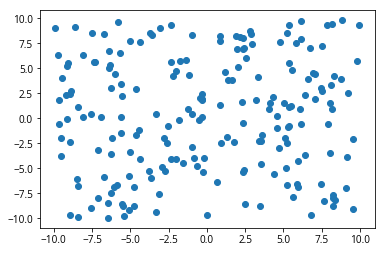

In [17]:
# The objective to generate 200 points sample
N = 200
xCord = -10 + 20 * np.random.rand(N)
yCord = -10 + 20 * np.random.rand(N)

plt.scatter(xCord,yCord)

In [52]:
## So, the points will start from the 

xStart = -10
xEnd = 10

yStart = -10
yEnd = 10

xx, yy = np.meshgrid(np.arange(xStart, xEnd, 0.01),
                     np.arange(yStart,yEnd, 0.01))

tst = np.c_[xx.ravel(), yy.ravel()]

## The complex function that need to be plot
We have three available flavor here.

In [127]:
def func1(x,y):
#     return (y*y) - (x*x) + ((x*x*x)/8) - ((y*y*y)/6)
#     return (x**2)*y + (y**3)*x
    return y - x*np.sin(x)

## Generating the Z co-ordinate.

In [128]:
Z = func1(tst[:,0],tst[:,1])
Z_cord = func1(xCord,yCord)

In [129]:
xp = xCord
yp = yCord

In [130]:
Z = Z.reshape(xx.shape)

# Z_temp = Z.copy()

In [131]:
from matplotlib import cm

In [132]:
import matplotlib as mpl
from matplotlib import pyplot as plt

In [133]:
cmap = plt.cm.jet  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (.5, .5, .5, 1.0)
# create the new map
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
cmap = colors.ListedColormap(['red', 'blue'])

## Class identification Module.


In [134]:
xf = xCord[Z_cord > 0]
yf = yCord[Z_cord > 0]
zf = Z_cord[Z_cord > 0]

xs = xCord[Z_cord < 0]
ys = yCord[Z_cord < 0]
zs = Z_cord[Z_cord < 0]

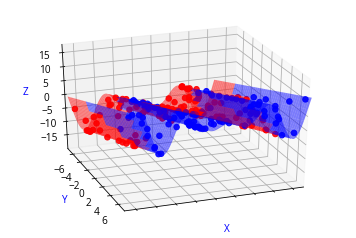

In [155]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(xx, yy, Z,alpha=0.5,cmap=cmap )
# plt.contourf(xx, yy, Z, alpha=0.3,colors=['red','black','blue','black'])
# ax.scatter(xCord,yCord,Z_cord,color='black',s=[30],alpha=0.8)
ax.scatter(xs, ys,zs,color='red',s=[30],alpha=0.9)
ax.scatter(xf, yf,zf,color='blue',s=[30],alpha=0.9)
# ax.axis([-5,15,0,20])
# ax.set_zlim([0,1])



# Turn off tick labels
# ax.set_xticklabels([2.0,2.5,3,3.5,4,4.5,5,5.5,6,6.5])
# ax.set_yticklabels([5,6,7,8,9,10,11,12,13,14,15,16])

# major_ticks = np.arange(xStart, xEnd, 5)
# minor_ticks = np.arange(xStart, xEnd, 2.5)

# major_ticks_y = np.arange(yStart, yEnd, 5)
# minor_ticks_y = np.arange(yStart, yEnd, 2.5)

# ax.set_xticks(major_ticks_y)
# ax.set_xticks(minor_ticks_y, minor=True)
# ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)
ax.axis([-10,10,-10,10])
# And a corresponding grid
ax.grid(which='both',color='black',linestyle='--')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.1,visible='true')
ax.grid(which='major', alpha=0.5)

plt.xlabel('X',color='blue')
plt.ylabel('Y',color='blue')
ax.set_zlabel('Z',color='blue')
plt.axis('equal')
plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

#plt.axis('off')

# for angle in range(0, 360):
ax.view_init(30, 70)
# plt.draw()
# plt.pause(.001)
plt.savefig('plot_3_4.png',dpi=200)